## EDA OF THE MALL CUSTOMER DATASET

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading and taking a look at the dataset characteristics

In [3]:
# Load the dataset
mall = pd.read_csv('Dataset/Mall_Customers.csv')

In [4]:
# View the dataset information
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# View the dataset description
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Dataset shape
print(mall.shape)

# Dataset columns
mall.columns

(200, 5)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# Unique values in each column
mall.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

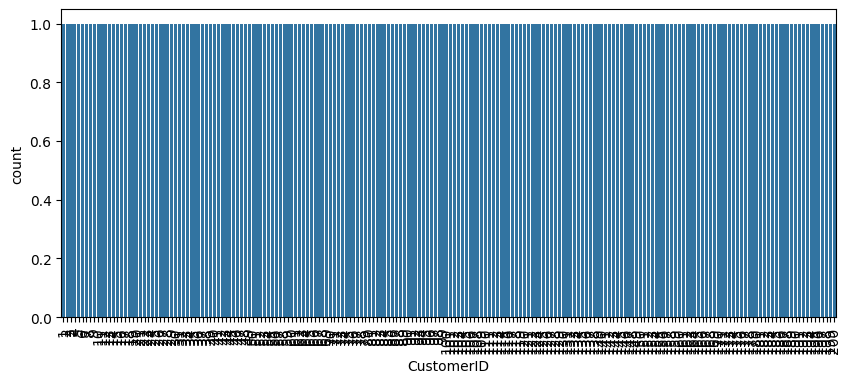

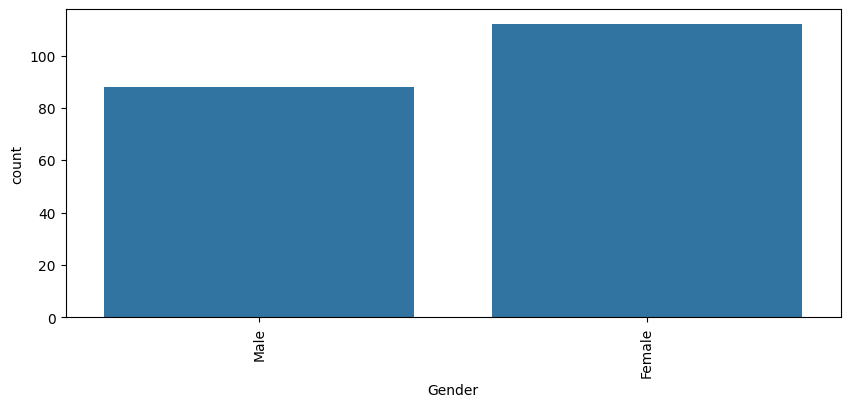

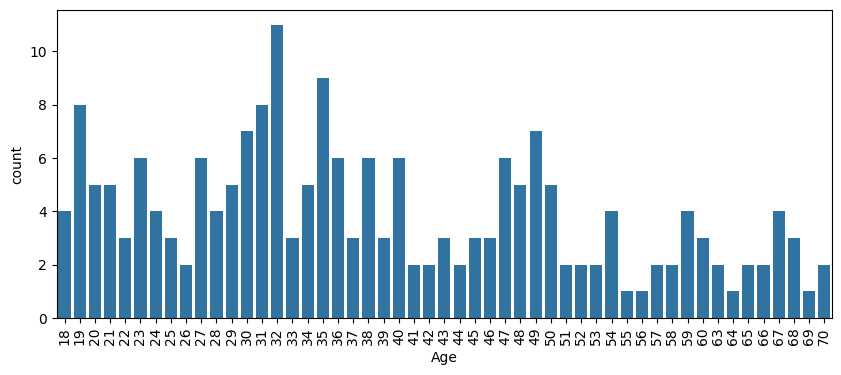

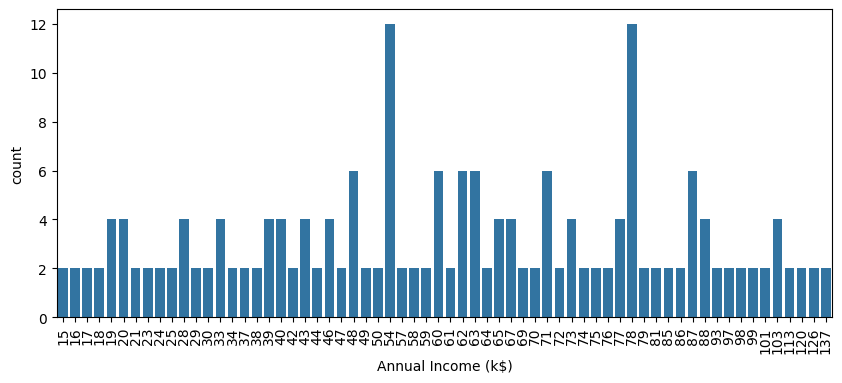

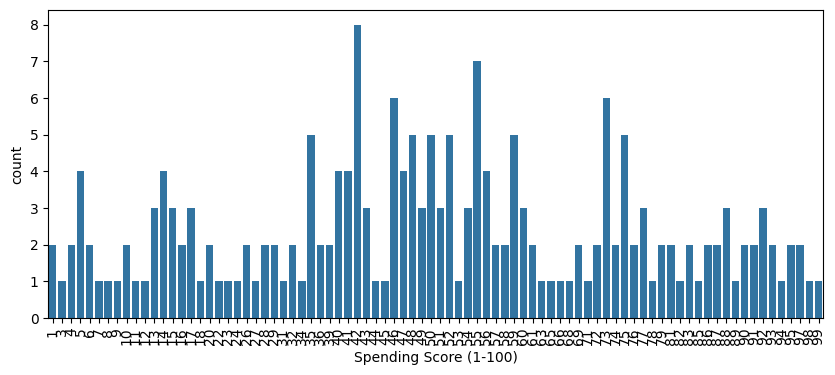

In [11]:
# Visualizing the unique values

columns = mall.columns.values.tolist()

for col in columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=mall)
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.show()
# sns.countplot(x='Gender',data=mall)

In [12]:
# Checking for null values

mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# Dropping the columns that are not required

mall.drop(['CustomerID'],axis=1,inplace=True)
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


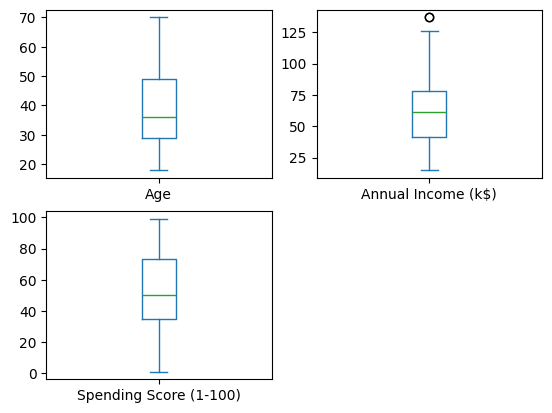

In [15]:
# Outlier Analysis

mall.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<Figure size 1000x800 with 0 Axes>

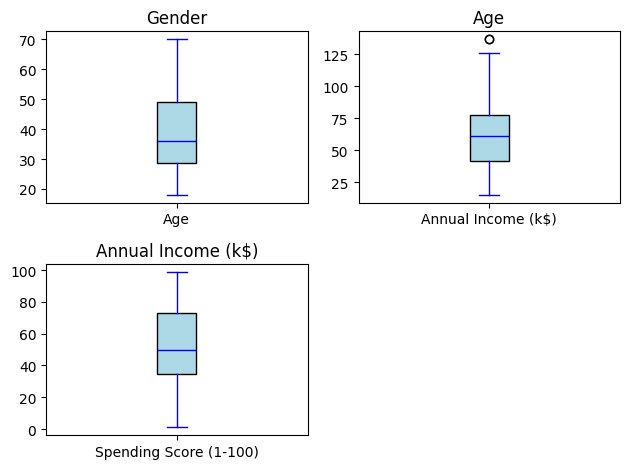

In [16]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create box plots with custom color and title
mall.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, 
        color='blue', patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Set the title for each subplot
for ax, col in zip(plt.gcf().axes, mall.columns):
    ax.set_title(col)

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
# Getting the quartiles

mall_numeric = mall.select_dtypes(include=[np.number])
quartiles = mall_numeric.quantile(q=[0.25,0.5, 0.75])
q = mall.describe()

# Print the quartiles
print(quartiles)
print(q)

        Age  Annual Income (k$)  Spending Score (1-100)
0.25  28.75                41.5                   34.75
0.50  36.00                61.5                   50.00
0.75  49.00                78.0                   73.00
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


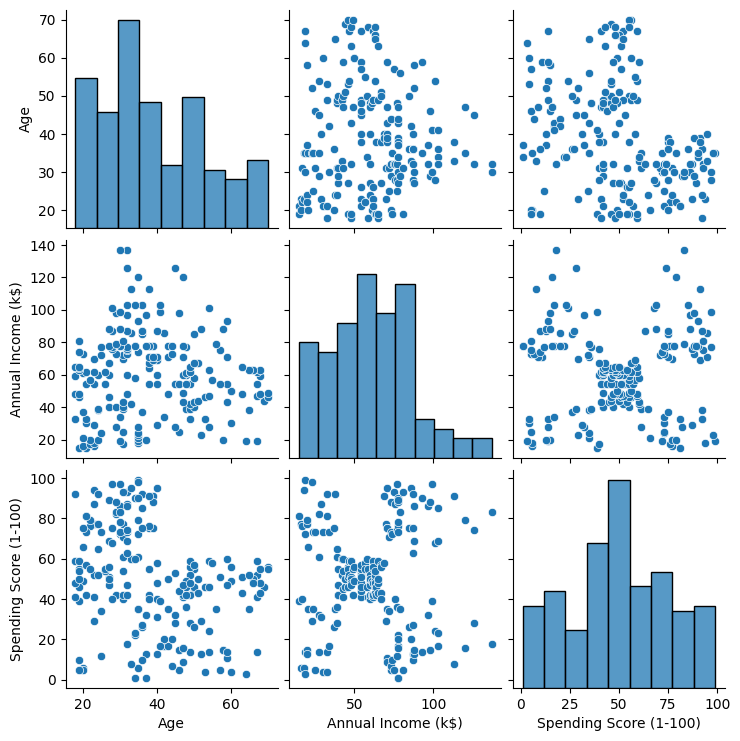

In [14]:
# Relationship analysis

sns.pairplot(mall)

In [24]:
# Handling object columns

# mall = pd.get_dummies(mall, columns=['Gender'], drop_first=True) # this is usually used for categorical variable with more than two categories

# .map() is used to convert the categorical variable into numerical variable which is a binary categorial variable

mall['Gender'] = mall['Gender'].map({'Male': 0, 'Female': 1})

mall.Gender.value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

In [26]:
# Correlation analysis

corr = mall.corr()
corr

# This is not of much important in this case since K-means is an unsupervised model

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


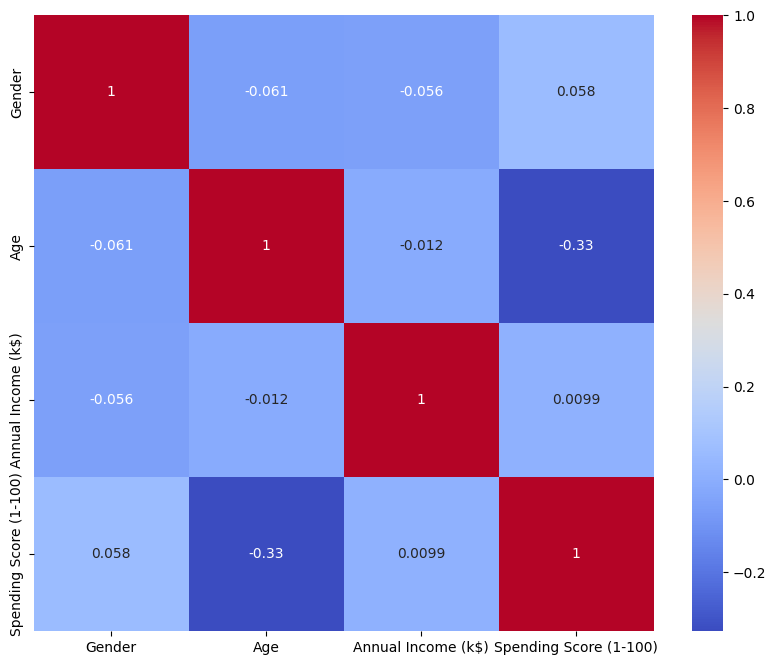

In [27]:
# Visualizing the correlation

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [29]:
# Saving the processed dataset

mall.to_csv('Dataset/Mall_Customers_processed.csv', index=False)